<a href="https://colab.research.google.com/github/eotache/Data-Analysis-Projects/blob/master/Nigeria_Covid_19_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### NIGERIA COVID-19 DATA ANALYSIS PROJECT (23/05/2020)

Covid-19 pandemic is a global health crisis, that is a great challenge to our health care system and impacting the worlds economy and human activities all around the globe. The virus has spread to all part of the continent with over 5 million confirmed cases and a daily rise in case in America, Europe and Africa. 
However, the positive news is that the UN, WHO, Healthcare communities, Scientist and Governments are working round the clock to curb the spread of the disease and pushing further for a drug or vaccine that can eventually cure the virus.  
In Nigeria, the NCDC(Nigeria Center for Disease control) provides daily update on the cases of Covid-19, the center as been at the fore front of dessimating information to the public about the virus. 
currently we have over 7000 confirmed cases in Nigeria. 

This project will bring more insight into COVID-19 cases in Nigeria and provide detailed data analysis and visualization. 

In this project I will be using: 
jupyter Note book, Pandas Library for data cleaning and manipulation, numpy library for arithematic calculations, Matplotlip, Seaborn, pixiedust libraries for Visualization, foluim library for map creation, beautiful soup and tabulate libraries for web scrapping,

### 1. Importing libraries and web scrapping to get data. 

In [3]:
import pandas as pd #for data cleaning and manipulation
import numpy as np
import matplotlib.pyplot as plt #for data visualizaion
import seaborn as sns           #for data visualization
import requests 
from bs4 import BeautifulSoup  #for web scrapping
from tabulate import tabulate  #for tabulation scrapped data
import folium                  #for map creation

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#scrapping data from NCDC official website
res = requests.get('https://covid19.ncdc.gov.ng/')

In [0]:
soup = BeautifulSoup(res.content, 'lxml')
table = soup.find_all('table')[0]
DF = pd.read_html(str(table))[0]

In [6]:
DF.head(6)

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,4377,3585,745,47
1,Kano,942,709,192,41
2,FCT,564,388,162,14
3,Katsina,358,293,51,14
4,Oyo,275,174,95,6
5,Jigawa,265,183,78,4


In [7]:
#to get the total sum of the values in the table
DF.sum()

States Affected                 LagosKanoFCTKatsinaOyoJigawaBornoEdoOgunBauchi...
No. of Cases (Lab Confirmed)                                                 9302
No. of Cases (on admission)                                                  6344
No. Discharged                                                               2697
No. of Deaths                                                                 261
dtype: object

### 2. converting tables to list and tuple for easy access as DataFrame

In [0]:
#The aim is to convert each column in the NCDC dataset into a list using the (tolist() function)
States_Affected = DF["States Affected"].tolist()
Cases = DF['No. of Cases (Lab Confirmed)'].tolist()
Active = DF['No. of Cases (on admission)'].tolist()
Discharged = DF['No. Discharged'].tolist()
Deaths = DF['No. of Deaths'].tolist()

In [0]:
#the above list are converted into a tuple for easy convertion into a dataframe using (zip function)
zippedList =  list(zip(States_Affected, Cases, Active, Discharged, Deaths))

#Assinging a new dataframe called (Cov19_Nig) which contains list of states and Covid_19 cases
Cov19_Nig = pd.DataFrame(zippedList, columns = ['States' , 'Cases', 'Active', 'Discharged', 'Deaths'])

In [10]:
Cov19_Nig.head(10)

,States,Cases,Active,Discharged,Deaths
0,Lagos,4377,3585,745,47
1,Kano,942,709,192,41
2,FCT,564,388,162,14
3,Katsina,358,293,51,14
4,Oyo,275,174,95,6
5,Jigawa,265,183,78,4
6,Borno,264,77,162,25
7,Edo,262,180,69,13
8,Ogun,246,109,128,9
9,Bauchi,236,21,208,7


In [11]:
#summary value of our new dataframe(Cov19_Nig)
Cov19_Nig.describe()

,Cases,Active,Discharged,Deaths
count,36.000000,36.000000,36.000000,36.000000
mean,258.388889,176.222222,74.916667,7.250000
std,730.197988,600.570448,129.264375,10.635184
min,2.000000,0.000000,0.000000,0.000000
25%,28.750000,6.750000,11.500000,1.000000
50%,59.500000,30.500000,32.000000,4.000000
75%,238.500000,85.750000,93.500000,7.500000
max,4377.000000,3585.000000,745.000000,47.000000


In [0]:
# Selecting columns to be used for plot a bar chart and assigning it to a new variable called(No_cases)
No_cases = Cov19_Nig[['States', 'Cases', 'Active']]

In [13]:
No_cases.head(6)

,States,Cases,Active
0,Lagos,4377,3585
1,Kano,942,709
2,FCT,564,388
3,Katsina,358,293
4,Oyo,275,174
5,Jigawa,265,183


### 3. Visualization using graphs using Matplotlib, seaborn and pixiedust

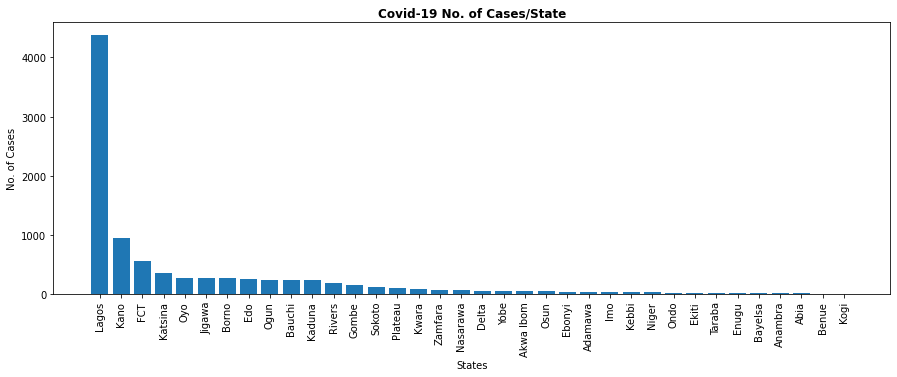

In [14]:
#Using Matplotlib to compare data of cases per state using barchart
fig= plt.figure(figsize=(15,5))
States = No_cases['States']
plt.bar(No_cases['States'], No_cases['Cases'])
plt.xticks(States, rotation='vertical')
plt.title('Covid-19 No. of Cases/State',  fontdict={'fontweight': 'bold'})
plt.ylabel('No. of Cases')
plt.xlabel('States')

plt.show()

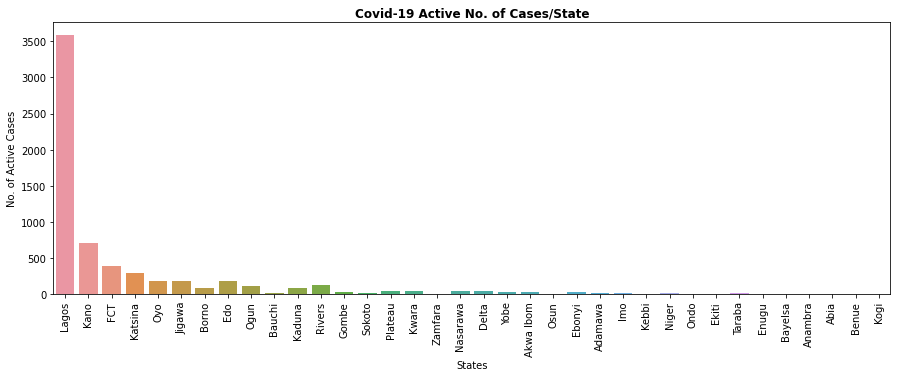

In [15]:
# Using Seaborn (sns) to compare data of  active cases per state
plt.figure(figsize=(15,5))
sns.barplot(x='States', y='Active', data=No_cases)
sns.set(style="whitegrid")
plt.title('Covid-19 Active No. of Cases/State',  fontdict={'fontweight': 'bold'})
plt.ylabel('No. of Active Cases')
plt.xticks(rotation=90)

plt.show()


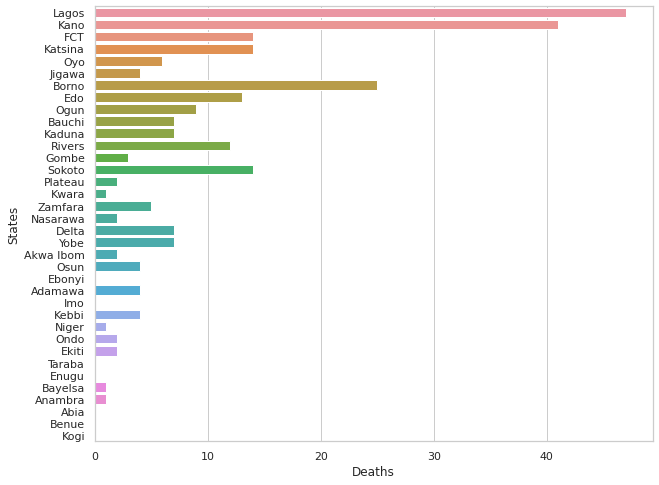

In [16]:
plt.figure(figsize=(10,8))
sns.barplot(x=Cov19_Nig['Deaths'],y=Cov19_Nig['States'])
plt.show()

### 4. plotting map to showing Covid-19 No. of cases by state

In [0]:
# To start with, I will need to get the longitude and latitude of states in Nigeria.
#I will be downlaoded the CSV from (ng.com) and importing it into work(pd.read_CVS())

In [0]:
cordinates = pd.read_csv('ng.csv')

In [0]:
#to view table
cordinates.head()

,city,lat,lng,country,iso2,admin,capital,population,population_proper
0,Lagos,6.454066,3.394673,Nigeria,NG,Lagos,minor,9466000.0,1536.0
1,Kano,12.002381,8.513160,Nigeria,NG,Kano,admin,3140000.0,3140000.0
2,Ibadan,7.377562,3.905907,Nigeria,NG,Oyo,admin,2628000.0,1814570.0
3,Abuja,9.083333,7.533333,Nigeria,NG,Federal Capital Territory,primary,1576000.0,162135.0
4,Kaduna,10.526413,7.438795,Nigeria,NG,Kaduna,admin,1442000.0,940593.0


In [0]:
#The above table contain columns we dont need, as such we will be dropping them.
cordinates = cordinates.drop(columns=['iso2','population', 'population_proper', 'country', 'city'])

In [0]:
cordinates.head(5)

,lat,lng,admin,capital
0,6.454066,3.394673,Lagos,minor
1,12.002381,8.513160,Kano,admin
2,7.377562,3.905907,Oyo,admin
3,9.083333,7.533333,Federal Capital Territory,primary
4,10.526413,7.438795,Kaduna,admin


In [0]:
# Viewing our data, they contain towns and city that are irrelevant our project, 
#hence I will be filter to keep state and capitals only

In [0]:
state = cordinates[cordinates['capital']== 'admin']
state.shape

(36, 4)

In [0]:
state.head()

,lat,lng,admin,capital
1,12.002381,8.513160,Kano,admin
2,7.377562,3.905907,Oyo,admin
4,10.526413,7.438795,Kaduna,admin
5,6.338153,5.625749,Edo,admin
7,4.777423,7.013404,Rivers,admin


In [0]:
Cov19_Nig.head()

,States,Cases,Active,Discharged,Deaths
0,Lagos,4377,3585,745,47
1,Kano,942,709,192,41
2,FCT,564,388,162,14
3,Katsina,358,293,51,14
4,Oyo,275,174,95,6


In [0]:
# I will rename (admin to States) for clarity
state = state.rename(columns={'admin': 'States'})

In [0]:
state.head()

,lat,lng,States,capital
1,12.002381,8.513160,Kano,admin
2,7.377562,3.905907,Oyo,admin
4,10.526413,7.438795,Kaduna,admin
5,6.338153,5.625749,Edo,admin
7,4.777423,7.013404,Rivers,admin


In [0]:
# I will be sorting both state and Cov19_Nig by States alphabetical order, this will make it easy merge both data set

In [0]:
state.sort_values('States')

,lat,lng,States,capital
33,5.524913,7.494613,Abia,admin
53,9.208394,12.481464,Adamawa,admin
19,5.033333,7.926570,Akwa Ibom,admin
20,6.212690,7.071986,Anambra,admin
27,10.310321,9.843883,Bauchi,admin
494,4.926746,6.267636,Bayelsa,admin
694,7.733746,8.521390,Benue,admin
10,11.846924,13.157122,Borno,admin
22,4.958931,8.326950,Cross River,admin
280,6.198474,6.727431,Delta,admin


In [0]:
#I noticed in our dataframe above (FCT) is missing in States column, as such I manually input the neccessary figure 
# by creating a dictionary and using the append keyword. 
new_row = {'lat':7.3986, 'lng':9.0765, 'States':'FCT', 'capital':'admin'}


In [0]:
states = state.append(new_row, ignore_index=True)

In [0]:
state.sort_values('States')

,lat,lng,States,capital
33,5.524913,7.494613,Abia,admin
53,9.208394,12.481464,Adamawa,admin
19,5.033333,7.926570,Akwa Ibom,admin
20,6.212690,7.071986,Anambra,admin
27,10.310321,9.843883,Bauchi,admin
494,4.926746,6.267636,Bayelsa,admin
694,7.733746,8.521390,Benue,admin
10,11.846924,13.157122,Borno,admin
22,4.958931,8.326950,Cross River,admin
280,6.198474,6.727431,Delta,admin


In [0]:
Cov19_Nig.sort_values('States')

,States,Cases,Active,Discharged,Deaths
31,Abia,7,6,1,0
22,Adamawa,27,12,13,2
26,Akwa Ibom,21,7,12,2
33,Anambra,6,5,1,0
6,Bauchi,230,69,156,5
30,Bayelsa,8,2,6,0
34,Benue,5,4,1,0
4,Borno,247,111,111,25
21,Delta,31,13,12,6
25,Ebonyi,22,20,2,0


In [0]:
#I noticed Kogi don't have Cases record in Cov19_Nig DataFrame, I will be inputing it manually
new_row1 = {'States':'Kogi','Cases':0, 'Active':0, 'Discharged': 0, 'Deaths':0}

In [0]:
Cov19_Nig = Cov19_Nig.append(new_row1, ignore_index=True)

In [0]:
Cov19_Nig.sort_values('States')

,States,Cases,Active,Discharged,Deaths
33,Abia,10,7,3,0
23,Adamawa,38,14,20,4
20,Akwa Ibom,45,29,14,2
32,Anambra,11,7,3,1
9,Bauchi,236,21,208,7
31,Bayelsa,12,5,6,1
34,Benue,7,6,1,0
6,Borno,264,77,162,25
18,Delta,57,36,14,7
22,Ebonyi,40,32,8,0


In [0]:
# I merge the two DataFrames together on states
Map_data = pd.merge(state, Cov19_Nig, on='States')
Map_data.shape

(36, 8)

In [0]:
Map_data.head(6)

,lat,lng,States,capital,Cases,Active,Discharged,Deaths
0,12.002381,8.513160,Kano,admin,942,709,192,41
1,7.377562,3.905907,Oyo,admin,275,174,95,6
2,10.526413,7.438795,Kaduna,admin,232,78,147,7
3,6.338153,5.625749,Edo,admin,262,180,69,13
4,4.777423,7.013404,Rivers,admin,190,130,48,12
5,11.846924,13.157122,Borno,admin,264,77,162,25


#### Map feature of Nigeria Covid-19 datasets

In [0]:
#Create Map of Nigeria before we insert cases into each states
Nigeria_map = folium.Map(location=[9.0820, 8.6753], zoom_start = 7)

Nigeria_map

In [0]:
# initiating map using a feature group of folium library for cases in our Map_data Data frame
Map = folium.map.FeatureGroup()

In [0]:
# create a loop function to loop through the Map_data and add each cases to feature group
for lat, lng, in zip(Map_data.lat, Map_data.lng):
    Map.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=3, 
            color='red',
            fill=True,
            fill_color='green',
            fill_opacity=0.4
        )
    )

In [0]:
# to add pop-up cases text to each marker on the map
latitudes = list(Map_data.lat)
longitudes = list(Map_data.lng)
labels = list(Map_data.Cases)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng],
                  popup= folium.Popup('<strong>' + str(label) + '</strong>')).add_to(Nigeria_map) 
       
    
# add Cases to map
Nigeria_map.add_child(Map)

In [0]:
### Creating map for active cases

In [0]:
# create a loop function to loop through the Map_data and add each cases to feature group
for lat, lng, in zip(Map_data.lat, Map_data.lng):
    Map.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=3, 
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.4
        )
    )

In [0]:
# to add pop-up Active  text to each marker on the map
latitudes = list(Map_data.lat)
longitudes = list(Map_data.lng)
labels = list (Map_data.Active)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng],
                  popup= folium.Popup('<strong>' + str(label) + '</strong>')).add_to(Nigeria_map) 
       
    
# add Cases to map
Nigeria_map.add_child(Map)

In [0]:
### Creating map for Deaths cases

In [0]:
# create a loop function to loop through the Map_data and add each cases to feature group
for lat, lng, in zip(Map_data.lat, Map_data.lng):
    Map.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=3, 
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.4
        )
    )

In [0]:
# to add pop-up Active  text to each marker on the map
latitudes = list(Map_data.lat)
longitudes = list(Map_data.lng)
labels = list (Map_data.Deaths)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng],
                  popup= folium.Popup('<strong>' + str(label) + '</strong>')).add_to(Nigeria_map) 
       
    
# add Cases to map
Nigeria_map.add_child(Map)

### UPDATE

According to the NCDC(Nigeria center for disease control, by midnight 29th, May 2020, the total number of confirmed cases  (9,302), number of active cases (6,344), number of dischared cases (2,697), and number of death (261). Furthermore, unknown exposure accounts for 74%(6617) provenance, contacts account for 24%(2088) and travels account for 2%(210). 
However, the NCDC has activated the emergency operations ceneters(EOC) at level 3, the highest in the country. subsequently, engagement with state level partners are continously held, on modalities of supports to help contain the spread of the virus and reduce the risk and rate of infections. 